# Image Segmentation using Scikit
- [Reference](https://towardsdatascience.com/image-segmentation-using-pythons-scikit-image-module-533a61ecc980)

In [1]:
!pip install scikit-image

# Overview of Images in Python

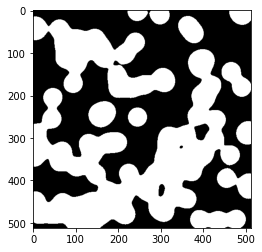

In [2]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
image = data.binary_blobs()
plt.imshow(image, cmap='gray')

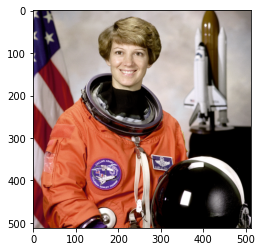

In [3]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
image = data.astronaut()
plt.imshow(image)

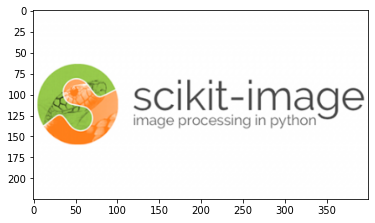

In [4]:
# The I/O module is used for importing the image
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
image = io.imread('https://bids.berkeley.edu/sites/default/files/styles/400x225/public/projects/sci-kit_for_page.png?itok=7rnTUXhx')
plt.imshow(image);

In [5]:
images = io.ImageCollection('../images/*.png:../images/*.jpg')
print('Type:', type(images))

Type: <class 'skimage.io.collection.ImageCollection'>


In [0]:
#Saving file as ‘logo.png’
io.imsave('logo.png', image)

![alt text](https://miro.medium.com/max/1400/1*zKnOz-YWIKtIohhYcydNEQ.png)

# Thresholding

## Import libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

In [0]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fed87de5518>)

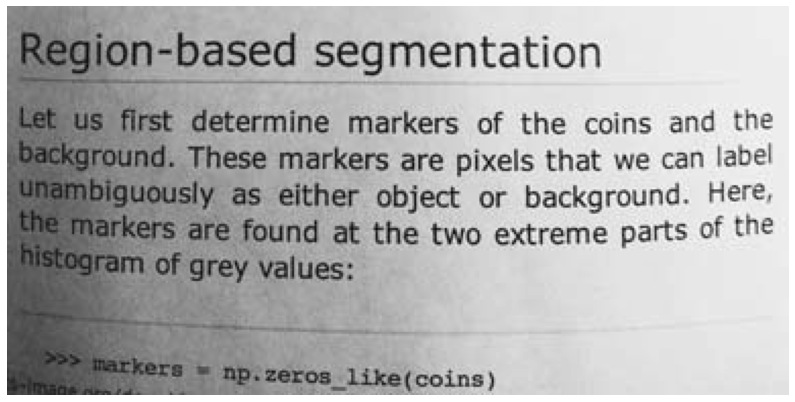

In [9]:
text = data.page()
image_show(text)

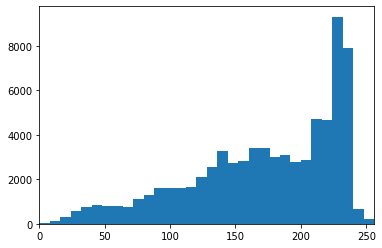

In [10]:
fig, ax = plt.subplots(1, 1)
ax.hist(text.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

## Supervised thresholding

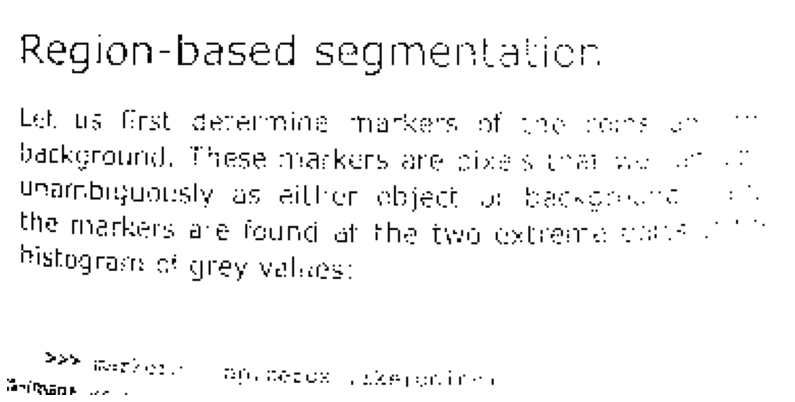

In [11]:
text_segmented = text > 50
image_show(text_segmented);

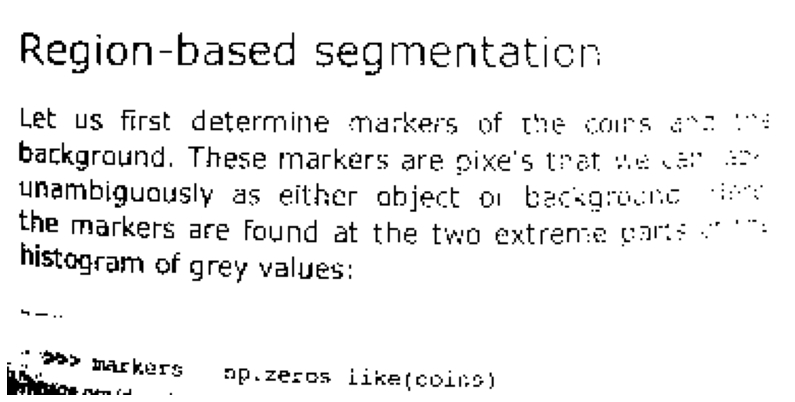

In [12]:
text_segmented = text > 70
image_show(text_segmented);

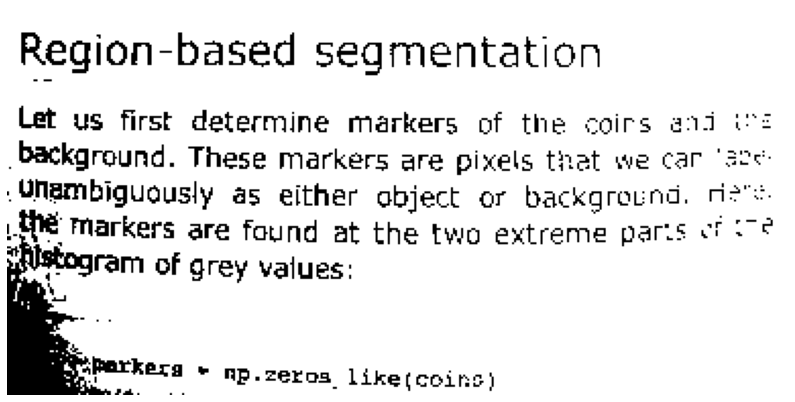

In [13]:
text_segmented = text > 90
image_show(text_segmented);

### Unsupervised thresholding

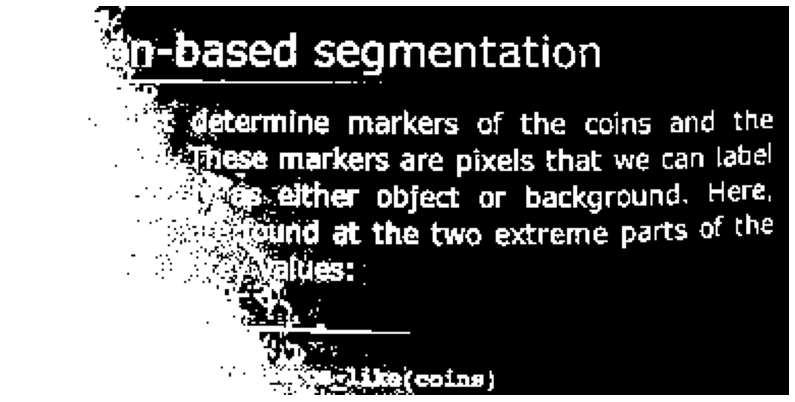

In [14]:
text_threshold = filters.threshold_otsu(text)
image_show(text < text_threshold);

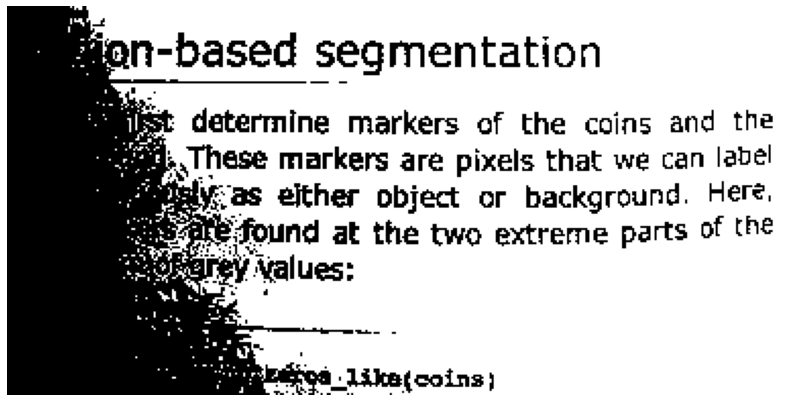

In [15]:
text_threshold = filters.threshold_li(text)

image_show(text > text_threshold);

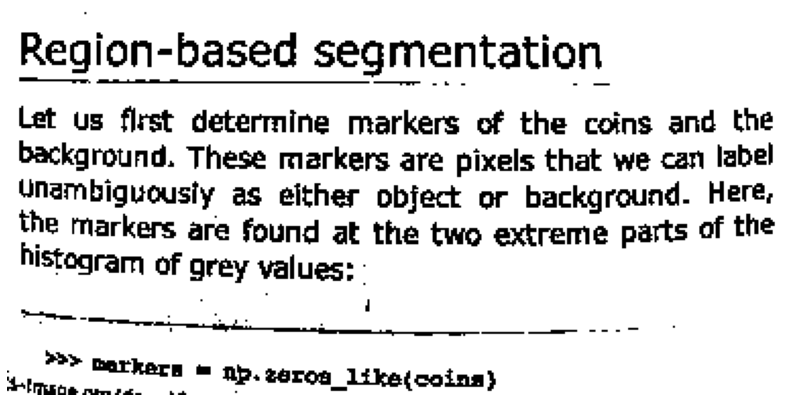

In [16]:
text_threshold = filters.threshold_local(text,block_size=51, offset=10) 
image_show(text > text_threshold);

## Supervised segmentation

In [32]:
import os
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
!pwd
os.chdir('gdrive/My Drive/Colab Notebooks/')
!pwd
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content
/content/gdrive/My Drive/Colab Notebooks
 abcnews-date-text.csv
 ab_data.csv
'A B Test.ipynb'
 AirPassengers.csv
'A method to categorical variable in flight delay datasets.ipynb'
'Analysis of hospital dataset.ipynb'
'ARIMA Forecasting.ipynb'
 assignment0.ipynb
'assignment2_(release).ipynb'
 assignment2_sol.ipynb
 Automotive_5.json
'Basic Time Series Manipulation.ipynb'
'Building a Simple Chatbot.ipynb'
 chatbot.txt
'Classifying Tweets for Sentiment A

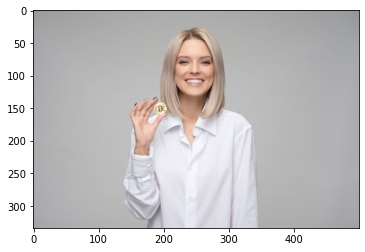

In [34]:
# import the image
from skimage import io
image = io.imread('girl.jpg') 
plt.imshow(image)

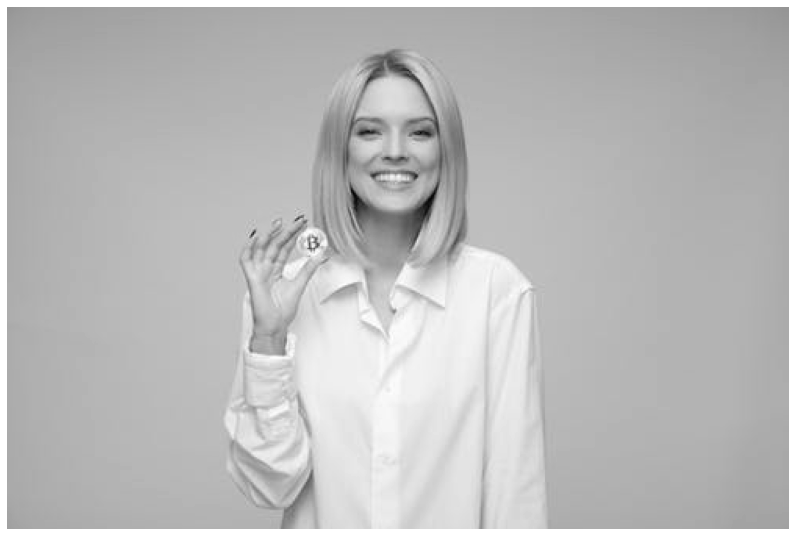

In [35]:
image_gray = color.rgb2gray(image) 
image_show(image_gray);

## Active contour segmentation

In [0]:
def circle_points(resolution, center, radius):
    """
    Generate points defining a circle on an image.
    """
    radians = np.linspace(0, 2*np.pi, resolution)

    c = center[1] + radius*np.cos(radians)
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T

# Exclude last point because a closed path should not have duplicate points
points = circle_points(200, [80, 250], 80)[:-1]

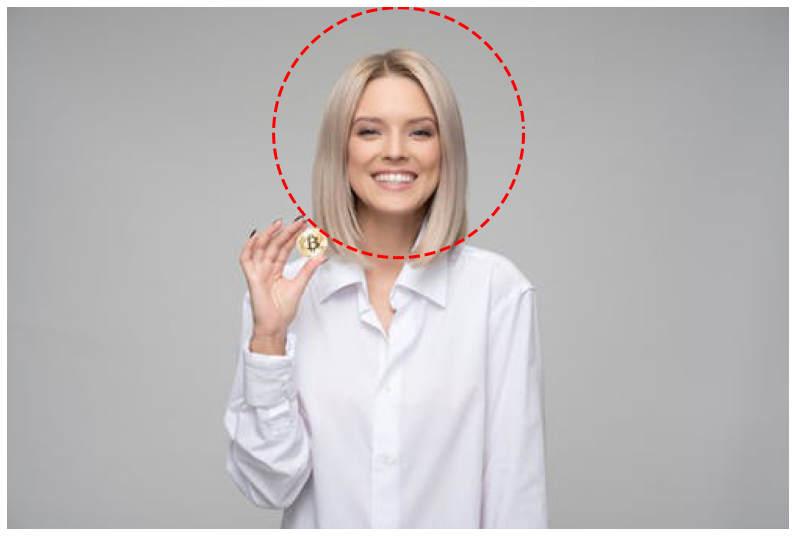

In [37]:
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  """Entry point for launching an IPython kernel.


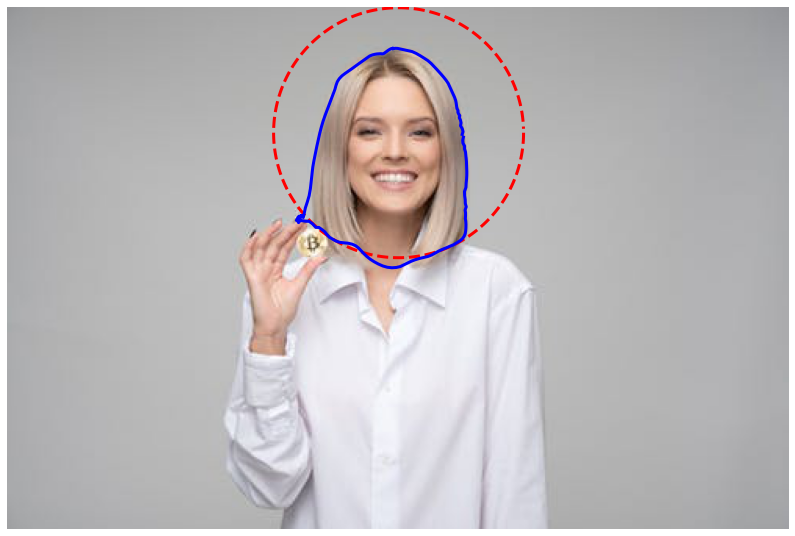

In [38]:
snake = seg.active_contour(image_gray, points)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  """Entry point for launching an IPython kernel.


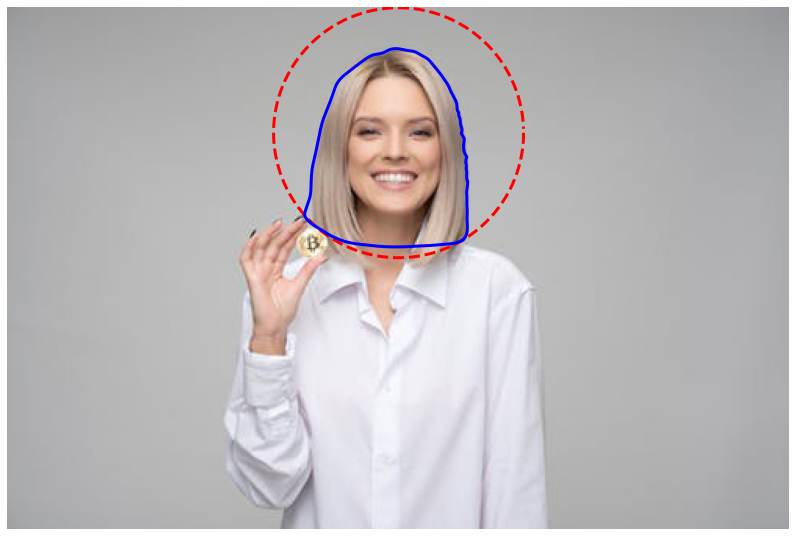

In [39]:
snake = seg.active_contour(image_gray, points,alpha=0.06,beta=0.3)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

### Random walker

In [0]:
image_labels = np.zeros(image_gray.shape, dtype=np.uint8)

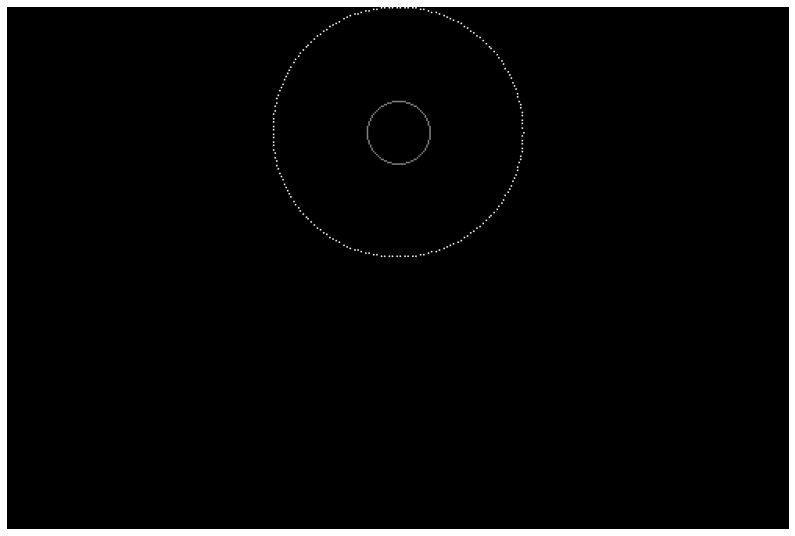

In [41]:
indices = draw.circle_perimeter(80, 250,20)#from here
image_labels[indices] = 1
image_labels[points[:, 1].astype(np.int), points[:, 0].astype(np.int)] = 2
image_show(image_labels);

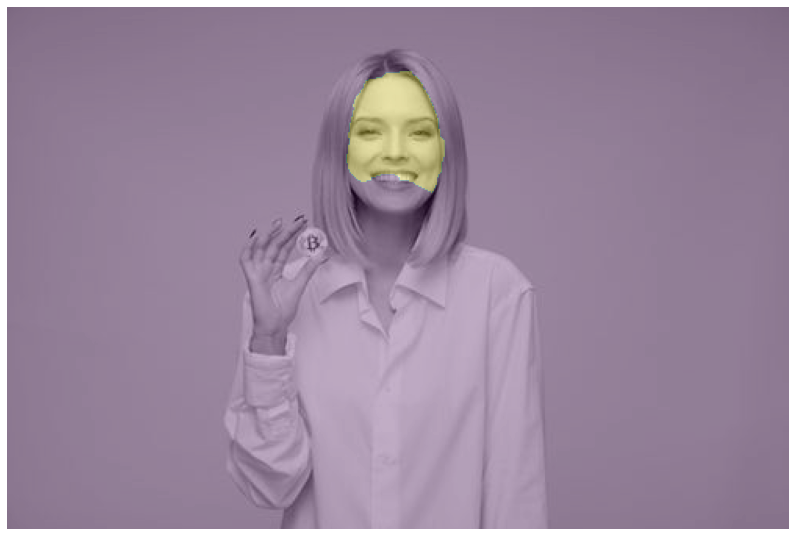

In [42]:
image_segmented = seg.random_walker(image_gray, image_labels)
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3);

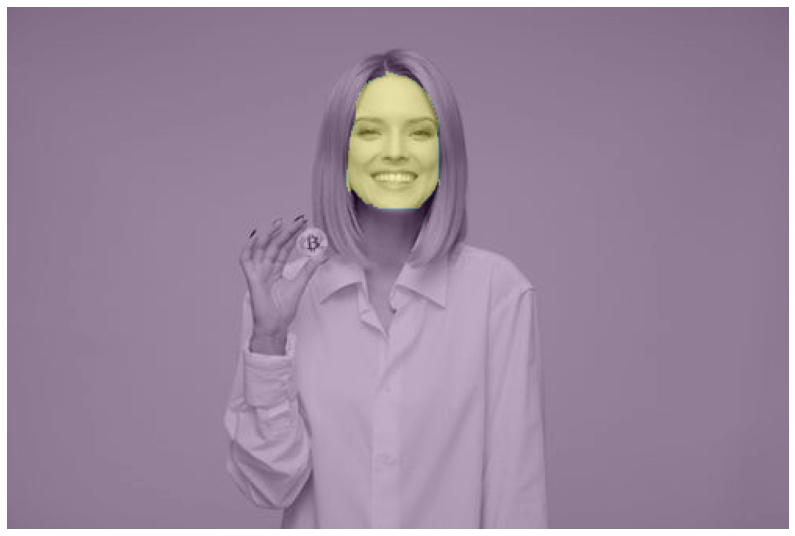

In [43]:
image_segmented = seg.random_walker(image_gray, image_labels, beta = 3000)
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3);

## Unsupervised segmentation

### SLIC( Simple Linear Iterative Clustering)

In [0]:
image_slic = seg.slic(image,n_segments=155)


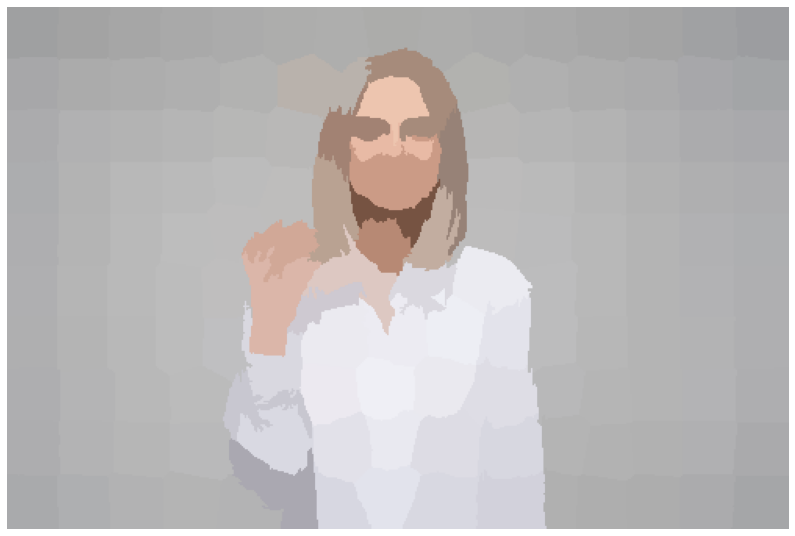

In [45]:
# label2rgb replaces each discrete label with the average interior color
image_show(color.label2rgb(image_slic, image, kind='avg'));

### Felzenszwalb

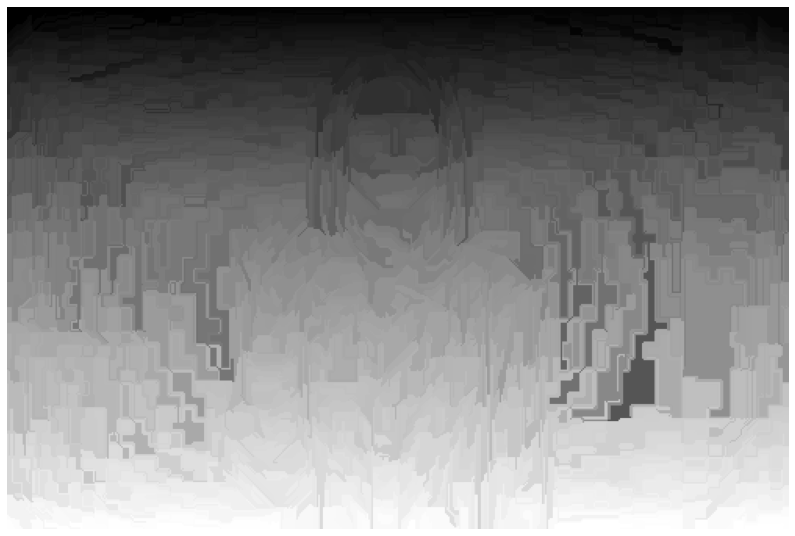

In [46]:
image_felzenszwalb = seg.felzenszwalb(image) 
image_show(image_felzenszwalb);

In [47]:
np.unique(image_felzenszwalb).size


2441

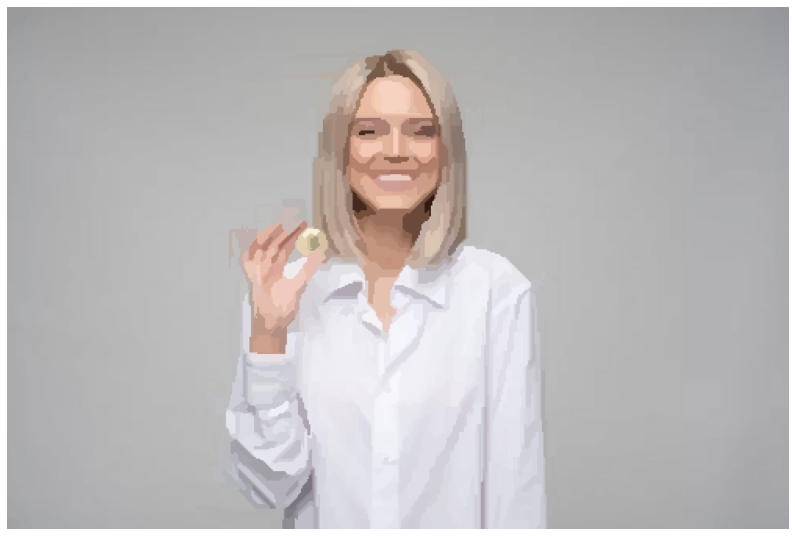

In [48]:
image_felzenszwalb_colored = color.label2rgb(image_felzenszwalb, image, kind='avg')
image_show(image_felzenszwalb_colored);